In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random 

from numpy.random import randn
from functools import wraps
from time import time

import warnings
warnings.filterwarnings('ignore')

### Goal: 
implement and analyse algorithms and their time complexity

### Formulation of the problem:
Time complexity of algorithms can and should be analysed and compared to achieve better perfomance.

In [2]:
def clock(repeats):
    def time_decorator(f):
        @wraps(f)
        def wrap(*args, **kwargs):
            measurements = []
            for _ in range(repeats):
                t = time()
                res = f(*args, **kwargs)
                measurements += [time()-t]
            return res, np.mean(measurements)
        return wrap
    return time_decorator        

### Brief theoretical part
In computer science, the time complexity is the computational complexity that describes the amount of time it takes to run an algorithm. Time complexity is commonly estimated by counting the number of elementary operations performed by the algorithm, supposing that each elementary operation takes a fixed amount of time to perform.

In [10]:
r_num = 25

@clock(repeats = r_num)
def constant(v):
    return 0


@clock(repeats = r_num)
def vector_sum(v):
    sum_v = 0
    for e in v:
        sum_v += e
    return sum_v


@clock(repeats = r_num)
def vector_prod(v):
    prod_v = 1
    for e in v:
        prod_v *= e
    return prod_v


@clock(repeats = r_num)
def polynom(v, x = 1):
    res = 0
    for i in range(len(v)):
        res += v[i]*x**i
    return res

@clock(repeats = r_num)
def polynom_horner(v, x = 1):
    res = 0
    xx = 1
    for i in range(len(v)):
        res += v[i]*xx
        xx *= x
    return res


@clock(repeats = r_num)
def bubble_sort(v):
    n = len(v)
    for i in range(n-1): 
        for j in range(0, n-i-1): 
            if v[j] > v[j+1] : 
                v[j], v[j+1] = v[j+1], v[j]
    return(v)


@clock(repeats = r_num)
def quicksort(v):
    def qsort(array):
        if len(array) < 2:
            return array

        low, same, high = [], [], []

        pivot = array[random.randint(0, len(array) - 1)]

        for item in array:
            if item < pivot:
                low.append(item)
            elif item == pivot:
                same.append(item)
            elif item > pivot:
                high.append(item)

        return qsort(low) + same + qsort(high)
    
    return qsort(v)

@clock(repeats = r_num)
def timsort(v):
    return sorted(v)


@clock(repeats = r_num)
def mat_mul(A, B):
    C = np.zeros(A.shape)
    n = len(C[0])
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k]*B[k, j]
    return C

In [9]:
def benchmark(f, n = 500):
    measurements = []
    timestomps = np.arange(50, n, 50)
    for i in timestomps:
        v = list(np.random.random(i)*100)
        measurements += [f(v)[1]]
    return timestomps, np.array(measurements)

### Results
One can see that all graphs are linear from simple observation. Therefore every function is O(n) except constant. Constant does not grow thus being O(1).

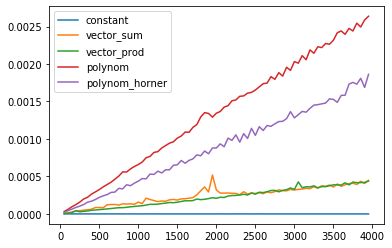

In [28]:
linear = [constant, vector_sum, vector_prod, polynom, polynom_horner]

for f in linear:
    bench = benchmark(f, 4000)
    plt.plot(bench[0], bench[1], label = f.__name__)
plt.legend()
plt.savefig('linear.png')
plt.show()


Bubble sort is quadratic algorithm buy its nature because it contain nested loop. Square root of time consumption is linear, so function is O(n**2)

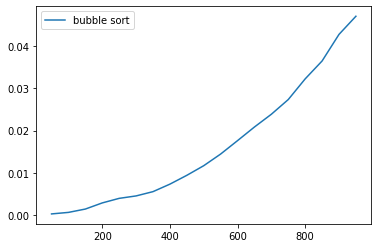

In [20]:
bench = benchmark(bubble_sort, 1000)
plt.plot(bench[0], bench[1], label = 'bubble sort')
plt.legend()
plt.savefig('bubble.png')
plt.show()

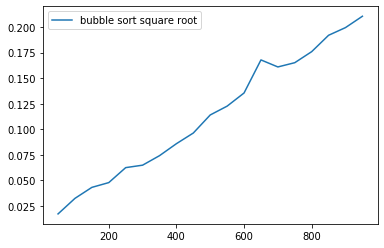

In [21]:
bench = benchmark(bubble_sort, 1000)
plt.plot(bench[0], np.sqrt(bench[1]), label = 'bubble sort square root')
plt.legend()
plt.savefig('bubble_sq.png')
plt.show()

Quicksort and timsort are O(n * log(n)) algorithms. It is hard to see difference from linear algorithms. Also timsort is more robust and thus faster then quicksort.

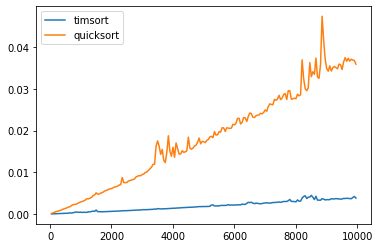

In [25]:
r_num = 15

loglinear = [timsort, quicksort]

for f in loglinear:
    bench = benchmark(f, 10000)
    plt.plot(bench[0], bench[1], label = f.__name__)
#plt.plot(bench[0], bench[0], label = 'linear')
plt.legend()
plt.savefig('sort.png')
plt.show()


Naive matrix multiplication is an O(n^3) algorithm, because of three consecutive nested loops. Algorithm will simply do n^3 multiplications and summ them up.

In [26]:
def benchmark_mat(n = 500):
    measurements = []
    timestomps = np.arange(50, n, 10)
    for i in timestomps:
        A = np.random.random([i, i])*10
        B = np.random.random([i, i])*10
        measurements += [mat_mul(A, B)[1]]
    return timestomps, np.array(measurements)

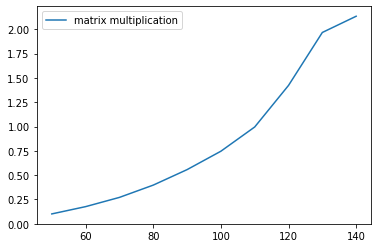

In [32]:
bench = benchmark_mat(150)
plt.plot(bench[0], bench[1], label = 'matrix multiplication')
plt.legend()
plt.savefig('matmul.png')
plt.show()

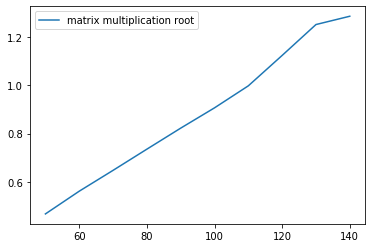

In [33]:

plt.plot(bench[0], bench[1]**(1/3), label = 'matrix multiplication root')
plt.legend()
plt.savefig('matmul_root.png')
plt.show()

### Conclusions
It has been shown that implemented algorithms differs in terms of time consumption and it depends on input size.